ZOMATO DATA ANALYSIS PROJECT

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("zomato.csv")

In [4]:
data

res_id                            name      establishment  \
0        3400299                     Bikanervala    ['Quick Bites']   
1        3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2        3401013                   Bhagat Halwai    ['Quick Bites']   
3        3400290                   Bhagat Halwai    ['Quick Bites']   
4        3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   
...          ...                             ...                ...   
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']   
211940   3200996                      Raju Omlet    ['Quick Bites']   
211941  18984164                The Grand Thakar  ['Casual Dining']   
211942   3201138                          Subway    ['Quick Bites']   
211943  18879846     Freshco's - The Health Cafe           ['Café']   

                                                      url  \
0       https://www.zomato.com/agra/bikanervala-khanda...   
1       https://www.zomato.com/agra/mama-chicken-mama-...   
2       https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3       https://www.zomato.com/agra/bhagat-halwai-civi...   
4       https://www.zomato.com/agra/the-salt-cafe-kitc...   
...                                                   ...   
211939  https://www.zomato.com/vadodara/kali-mirch-caf...   
211940  https://www.zomato.com/vadodara/raju-omlet-kar...   
211941  https://www.zomato.com/vadodara/the-grand-thak...   
211942  https://www.zomato.com/vadodara/subway-1-akota...   
211943  https://www.zomato.com/vadodara/freshcos-the-h...   

                                                  address      city  city_id  \
0       Kalyani Point, Near Tulsi Cinema, Bypass Road,...      Agra       34   
1             Main Market, Sadar Bazaar, Agra Cantt, Agra      Agra       34   
2       62/1, Near Easy Day, West Shivaji Nagar, Goalp...      Agra       34   
3       Near Anjana Cinema, Nehru Nagar, Civil Lines, ...      Agra       34   
4             1C,3rd Floor, Fatehabad Road, Tajganj, Agra      Agra       34   
...                                                   ...       ...      ...   
211939  Manu Smriti Complex, Near Navrachna School, GI...  Vadodara       32   
211940  Mahalaxmi Apartment, Opposite B O B, Karoli Ba...  Vadodara       32   
211941  3rd Floor, Shreem Shalini Mall, Opposite Conqu...  Vadodara       32   
211942  G-2, Vedant Platina, Near Cosmos, Akota, Vadodara  Vadodara       32   
211943  Shop 7, Ground Floor, Opposite Natubhai Circle...  Vadodara       32   

           locality   latitude  longitude  ... price_range  currency  \
0          Khandari  27.211450  78.002381  ...           2       Rs.   
1        Agra Cantt  27.160569  78.011583  ...           2       Rs.   
2          Shahganj  27.182938  77.979684  ...           1       Rs.   
3       Civil Lines  27.205668  78.004799  ...           1       Rs.   
4           Tajganj  27.157709  78.052421  ...           3       Rs.   
...             ...        ...        ...  ...         ...       ...   
211939    Fatehgunj  22.336931  73.192356  ...           2       Rs.   
211940   Karelibaug  22.322455  73.197203  ...           1       Rs.   
211941     Alkapuri  22.310563  73.171164  ...           2       Rs.   
211942        Akota  22.270027  73.143068  ...           2       Rs.   
211943     Vadiwadi  22.309935  73.158768  ...           2       Rs.   

                                               highlights aggregate_rating  \
0       ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4   
1       ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2       ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3       ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4       ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   
...                                                   ...              ...   
211939  ['Dinner', 'Cash', 'Lunch', 'Delivery', 'Ind

DATA EXPLORE

In [6]:
# Get the shape of data

In [7]:
data.shape

(211944, 26)

In [8]:
# Display columns

In [9]:
data.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [10]:
# data discription

In [11]:
data.describe()

res_id        city_id       latitude      longitude  country_id  \
count  2.119440e+05  211944.000000  211944.000000  211944.000000    211944.0   
mean   1.349411e+07    4746.785434      21.499758      77.615276         1.0   
std    7.883722e+06    5568.766386      22.781331       7.500104         0.0   
min    5.000000e+01       1.000000       0.000000       0.000000         1.0   
25%    3.301027e+06      11.000000      15.496071      74.877961         1.0   
50%    1.869573e+07      34.000000      22.514494      77.425971         1.0   
75%    1.881297e+07   11306.000000      26.841667      80.219323         1.0   
max    1.915979e+07   11354.000000   10000.000000      91.832769         1.0   

       average_cost_for_two    price_range  aggregate_rating          votes  \
count         211944.000000  211944.000000     211944.000000  211944.000000   
mean             595.812229       1.882535          3.395937     378.001864   
std              606.239363       0.892989          1.283642     925.333370   
min                0.000000       1.000000          0.000000     -18.000000   
25%              250.000000       1.000000          3.300000      16.000000   
50%              400.000000       2.000000          3.800000     100.000000   
75%              700.000000       2.000000          4.100000     362.000000   
max            30000.000000       4.000000          4.900000   42539.000000   

         photo_count  opentable_support       delivery  takeaway  
count  211944.000000           211896.0  211944.000000  211944.0  
mean      256.971224                0.0      -0.255907      -1.0  
std       867.668940                0.0       0.964172       0.0  
min         0.000000                0.0      -1.000000      -1.0  
25%         3.000000                0.0      -1.000000      -1.0  
50%        18.000000                0.0      -1.000000      -1.0  
75%       128.000000                0.0       1.000000      -1.0  
max     17702.000000                0.0       1.000000      -1.0

In [12]:
# Information about data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

DATA CLEANING

In [15]:
data.drop('zipcode', axis=1, inplace=True)

In [16]:
# find null values

In [17]:
data.isnull().sum()

res_id                     0
name                       0
establishment              0
url                        0
address                  134
city                       0
city_id                    0
locality                   0
latitude                   0
longitude                  0
country_id                 0
locality_verbose           0
cuisines                1391
timings                 3874
average_cost_for_two       0
price_range                0
currency                   0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
opentable_support         48
delivery                   0
takeaway                   0
dtype: int64

In [18]:
# fill null values

In [19]:
data.address = data.address.ffill()

In [20]:
data.opentable_support = data.opentable_support.fillna(data.opentable_support.mean())

In [21]:
data.cuisines = data.cuisines.bfill()

In [22]:
data.timings = data.timings.ffill()

In [23]:
data.dropna(inplace=True)

In [24]:
data

res_id                            name      establishment  \
0        3400299                     Bikanervala    ['Quick Bites']   
1        3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2        3401013                   Bhagat Halwai    ['Quick Bites']   
3        3400290                   Bhagat Halwai    ['Quick Bites']   
4        3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   
...          ...                             ...                ...   
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']   
211940   3200996                      Raju Omlet    ['Quick Bites']   
211941  18984164                The Grand Thakar  ['Casual Dining']   
211942   3201138                          Subway    ['Quick Bites']   
211943  18879846     Freshco's - The Health Cafe           ['Café']   

                                                      url  \
0       https://www.zomato.com/agra/bikanervala-khanda...   
1       https://www.zomato.com/agra/mama-chicken-mama-...   
2       https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3       https://www.zomato.com/agra/bhagat-halwai-civi...   
4       https://www.zomato.com/agra/the-salt-cafe-kitc...   
...                                                   ...   
211939  https://www.zomato.com/vadodara/kali-mirch-caf...   
211940  https://www.zomato.com/vadodara/raju-omlet-kar...   
211941  https://www.zomato.com/vadodara/the-grand-thak...   
211942  https://www.zomato.com/vadodara/subway-1-akota...   
211943  https://www.zomato.com/vadodara/freshcos-the-h...   

                                                  address      city  city_id  \
0       Kalyani Point, Near Tulsi Cinema, Bypass Road,...      Agra       34   
1             Main Market, Sadar Bazaar, Agra Cantt, Agra      Agra       34   
2       62/1, Near Easy Day, West Shivaji Nagar, Goalp...      Agra       34   
3       Near Anjana Cinema, Nehru Nagar, Civil Lines, ...      Agra       34   
4             1C,3rd Floor, Fatehabad Road, Tajganj, Agra      Agra       34   
...                                                   ...       ...      ...   
211939  Manu Smriti Complex, Near Navrachna School, GI...  Vadodara       32   
211940  Mahalaxmi Apartment, Opposite B O B, Karoli Ba...  Vadodara       32   
211941  3rd Floor, Shreem Shalini Mall, Opposite Conqu...  Vadodara       32   
211942  G-2, Vedant Platina, Near Cosmos, Akota, Vadodara  Vadodara       32   
211943  Shop 7, Ground Floor, Opposite Natubhai Circle...  Vadodara       32   

           locality   latitude  longitude  ...  price_range currency  \
0          Khandari  27.211450  78.002381  ...            2      Rs.   
1        Agra Cantt  27.160569  78.011583  ...            2      Rs.   
2          Shahganj  27.182938  77.979684  ...            1      Rs.   
3       Civil Lines  27.205668  78.004799  ...            1      Rs.   
4           Tajganj  27.157709  78.052421  ...            3      Rs.   
...             ...        ...        ...  ...          ...      ...   
211939    Fatehgunj  22.336931  73.192356  ...            2      Rs.   
211940   Karelibaug  22.322455  73.197203  ...            1      Rs.   
211941     Alkapuri  22.310563  73.171164  ...            2      Rs.   
211942        Akota  22.270027  73.143068  ...            2      Rs.   
211943     Vadiwadi  22.309935  73.158768  ...            2      Rs.   

                                               highlights aggregate_rating  \
0       ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4   
1       ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2       ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3       ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4       ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   
...                                                   ...              ...   
211939  ['Dinner', 'Cash', 'Lunch', 'Delivery', 'Ind

In [25]:
data.nunique()

res_id                  55568
name                    41100
establishment              27
url                     55568
address                 50657
city                       99
city_id                    83
locality                 3731
latitude                53356
longitude               53318
country_id                  1
locality_verbose         3910
cuisines                 9382
timings                  7740
average_cost_for_two      145
price_range                 4
currency                    1
highlights              31455
aggregate_rating           33
rating_text                39
votes                    2644
photo_count              2514
opentable_support           1
delivery                    3
takeaway                    1
dtype: int64

In [141]:
data.delivery =np.where(data.delivery=='1','Delivery',data.delivery)
data.delivery =np.where(data.delivery=='-1','No Delivery',data.delivery)
data.delivery =np.where(data.delivery=='0','unavailable',data.delivery)

In [143]:
data.price_range =np.where(data.price_range=='1','Budget',data.price_range)
data.price_range =np.where(data.price_range=='2','Affordable',data.price_range)
data.price_range =np.where(data.price_range=='3','Premium',data.price_range)
data.price_range =np.where(data.price_range=='4','Luxury',data.price_range)

In [28]:
# using groupby method

In [29]:
data.groupby('establishment')['votes'].sum().sort_values(ascending=False)

establishment
['Casual Dining']      34793372
['Quick Bites']        15737809
['Café']                7730552
['Bar']                 6025734
['Fine Dining']         2677467
['Lounge']              2585619
['Microbrewery']        2293292
['Pub']                 1868749
['Dessert Parlour']     1414232
['Sweet Shop']          1202229
[]                      1092366
['Bakery']              1017854
['Dhaba']                514305
['Beverage Shop']        456885
['Food Court']           267998
['Club']                 120209
['Food Truck']            88145
['Kiosk']                 87388
['Bhojanalya']            50996
['Mess']                  42573
['Cocktail Bar']          20529
['Paan Shop']              8497
['Butcher Shop']           8227
['Irani Cafe']             6117
['Confectionery']          3869
['Shack']                   160
['Pop up']                   54
Name: votes, dtype: int64

In [30]:
data.groupby('name')['photo_count'].sum().head(10).sort_values(ascending=False)

name
#Dilliwaala6                           13991
#BC                                    10170
#OFF Campus                             1736
#788 Avenue                             1354
#1, Culinary Avenue - The Red Maple      672
#BEiR                                    317
#Underground Restro & Bar                 26
#Jaipur Darbar                            14
#Selfieccino                              12
# Wednesday                               10
Name: photo_count, dtype: int64

In [31]:
data.groupby('name')['votes'].sum().head(10).sort_values(ascending=False)

name
#Dilliwaala6                           17102
#BC                                     8020
#788 Avenue                             1390
#OFF Campus                             1303
#1, Culinary Avenue - The Red Maple     1020
#BEiR                                    880
# Wednesday                               44
#Selfieccino                              26
#Jaipur Darbar                            17
#Underground Restro & Bar                 10
Name: votes, dtype: int64

In [32]:
data.groupby('city')['aggregate_rating'].sum().head(10).sort_values(ascending=False)

city
Bangalore     20249.7
Ahmedabad     12059.8
Ajmer         11648.5
Bhopal         9404.7
Agra           9160.9
Amritsar       8417.3
Aurangabad     7628.7
Allahabad      7371.3
Amravati       4823.2
Alappuzha      1661.0
Name: aggregate_rating, dtype: float64

In [33]:
# find the outliers

<Axes: xlabel='average_cost_for_two'>

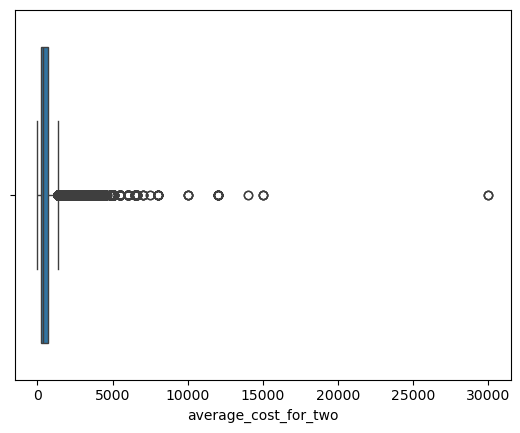

In [34]:
sns.boxplot(data.average_cost_for_two,orient='h')

In [35]:
Q1,Q3 = data.average_cost_for_two.quantile([0.25,0.75])

In [36]:
Q1,Q3

(250.0, 700.0)

In [37]:
IQR = Q3 - Q1

In [38]:
IQR

450.0

In [39]:
UL = Q3 +1.5*(IQR)
LL = Q1 -1.5*(IQR)

In [40]:
UL,LL

(1375.0, -425.0)

In [41]:
data[data.average_cost_for_two>UL]

res_id                         name      establishment  \
16      3400017               Pinch Of Spice  ['Casual Dining']   
22      3400018               Pinch Of Spice  ['Casual Dining']   
27      3400850                   Urban Deck  ['Casual Dining']   
34      3401344       Cafe Turquoise Cottage  ['Casual Dining']   
42      3400853                        Mocha           ['Café']   
...         ...                          ...                ...   
211875  3202109  Elysian: The Middle-Eastern    ['Fine Dining']   
211890  3201907                Indish Lounge    ['Fine Dining']   
211892  3201575      The Cravings Restaurant  ['Casual Dining']   
211893  3202109  Elysian: The Middle-Eastern    ['Fine Dining']   
211894  3201907                Indish Lounge    ['Fine Dining']   

                                                      url  \
16      https://www.zomato.com/agra/pinch-of-spice-civ...   
22      https://www.zomato.com/agra/pinch-of-spice-taj...   
27      https://www.zomato.com/agra/urban-deck-2-civil...   
34      https://www.zomato.com/agra/cafe-turquoise-cot...   
42      https://www.zomato.com/agra/mocha-tajganj?utm_...   
...                                                   ...   
211875  https://www.zomato.com/elysiantme?utm_source=a...   
211890  https://www.zomato.com/vadodara/indish-lounge-...   
211892  https://www.zomato.com/vadodara/the-cravings-r...   
211893  https://www.zomato.com/elysiantme?utm_source=a...   
211894  https://www.zomato.com/vadodara/indish-lounge-...   

                                                  address      city  city_id  \
16      23/453, Opposite Sanjay Cinema, Wazipura Road,...      Agra       34   
22                  1076/2, Fatehabad Road, Tajganj, Agra      Agra       34   
27      5th Floor, The P L Palace Hotel, MG Road, Sanj...      Agra       34   
34      76, 2nd floor, Fatehabad Road, Near Amar Hotel...      Agra       34   
42      1448 - 1453 tajganj, Fatehabad Road, Tajganj Agra      Agra       34   
...                                                   ...       ...      ...   
211875  FF 108, Golden Icon, Opposite BSNL, Chakli Cir...  Vadodara       32   
211890  406/407, Samnvay Zillion, Before Zydex House, ...  Vadodara       32   
211892  Near Bhimnath Bridge, Opposite Parsi Agryari, ...  Vadodara       32   
211893  FF 108, Golden Icon, Opposite BSNL, Chakli Cir...  Vadodara       32   
211894  406/407, Samnvay Zillion, Before Zydex House, ...  Vadodara       32   

           locality   latitude  longitude  ...  price_range currency  \
16      Civil Lines  27.201735  78.007625  ...       Luxury      Rs.   
22          Tajganj  27.159649  78.043304  ...       Luxury      Rs.   
27      Civil Lines  27.199573  78.003699  ...       Luxury      Rs.   
34          Tajganj  27.161003  78.031400  ...       Luxury      Rs.   
42          Tajganj  27.157950  78.051030  ...       Luxury      Rs.   
...             ...        ...        ...  ...          ...      ...   
211875     Vadiwadi  22.307717  73.165681  ...       Luxury      Rs.   
211890        Gotri  22.317809  73.125822  ...      Premium      Rs.   
211892   Sayajigunj  22.306557  73.183802  ...       Luxury      Rs.   
211893     Vadiwadi  22.307717  73.165681  ...       Luxury      Rs.   
211894        Gotri  22.317809  73.125822  ...      Premium      Rs.   

                                               highlights aggregate_rating  \
16      ['Lunch', 'Delivery', 'Credit Card', 'Dinner',...              4.6   
22      ['Delivery', 'Dinner', 'Cash', 'Credit Card', ...              4.6   
27      ['Dinner', 'Cash', 'Debit Card', 'Takeaway Ava...              4.3   
34      ['Lunch', 'Serves Alcohol', 'Takeaway Availabl...              4.6   
42      ['Dinner', 'Cash', 'Takeaway Available', 'Debi...              4.4   
...                                                   ...              ...   
211875  ['Lunch', 'Cash', 'Delivery', 'Debit Card', 'D...              3.8   
211890  ['Takeaway Av

In [42]:
data.average_cost_for_two = np.where(data.average_cost_for_two>UL,UL,data.average_cost_for_two)

In [43]:
data

res_id                            name      establishment  \
0        3400299                     Bikanervala    ['Quick Bites']   
1        3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2        3401013                   Bhagat Halwai    ['Quick Bites']   
3        3400290                   Bhagat Halwai    ['Quick Bites']   
4        3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   
...          ...                             ...                ...   
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']   
211940   3200996                      Raju Omlet    ['Quick Bites']   
211941  18984164                The Grand Thakar  ['Casual Dining']   
211942   3201138                          Subway    ['Quick Bites']   
211943  18879846     Freshco's - The Health Cafe           ['Café']   

                                                      url  \
0       https://www.zomato.com/agra/bikanervala-khanda...   
1       https://www.zomato.com/agra/mama-chicken-mama-...   
2       https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3       https://www.zomato.com/agra/bhagat-halwai-civi...   
4       https://www.zomato.com/agra/the-salt-cafe-kitc...   
...                                                   ...   
211939  https://www.zomato.com/vadodara/kali-mirch-caf...   
211940  https://www.zomato.com/vadodara/raju-omlet-kar...   
211941  https://www.zomato.com/vadodara/the-grand-thak...   
211942  https://www.zomato.com/vadodara/subway-1-akota...   
211943  https://www.zomato.com/vadodara/freshcos-the-h...   

                                                  address      city  city_id  \
0       Kalyani Point, Near Tulsi Cinema, Bypass Road,...      Agra       34   
1             Main Market, Sadar Bazaar, Agra Cantt, Agra      Agra       34   
2       62/1, Near Easy Day, West Shivaji Nagar, Goalp...      Agra       34   
3       Near Anjana Cinema, Nehru Nagar, Civil Lines, ...      Agra       34   
4             1C,3rd Floor, Fatehabad Road, Tajganj, Agra      Agra       34   
...                                                   ...       ...      ...   
211939  Manu Smriti Complex, Near Navrachna School, GI...  Vadodara       32   
211940  Mahalaxmi Apartment, Opposite B O B, Karoli Ba...  Vadodara       32   
211941  3rd Floor, Shreem Shalini Mall, Opposite Conqu...  Vadodara       32   
211942  G-2, Vedant Platina, Near Cosmos, Akota, Vadodara  Vadodara       32   
211943  Shop 7, Ground Floor, Opposite Natubhai Circle...  Vadodara       32   

           locality   latitude  longitude  ...  price_range currency  \
0          Khandari  27.211450  78.002381  ...   Affordable      Rs.   
1        Agra Cantt  27.160569  78.011583  ...   Affordable      Rs.   
2          Shahganj  27.182938  77.979684  ...            1      Rs.   
3       Civil Lines  27.205668  78.004799  ...            1      Rs.   
4           Tajganj  27.157709  78.052421  ...      Premium      Rs.   
...             ...        ...        ...  ...          ...      ...   
211939    Fatehgunj  22.336931  73.192356  ...   Affordable      Rs.   
211940   Karelibaug  22.322455  73.197203  ...            1      Rs.   
211941     Alkapuri  22.310563  73.171164  ...   Affordable      Rs.   
211942        Akota  22.270027  73.143068  ...   Affordable      Rs.   
211943     Vadiwadi  22.309935  73.158768  ...   Affordable      Rs.   

                                               highlights aggregate_rating  \
0       ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4   
1       ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2       ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3       ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4       ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   
...                                                   ...              ...   
211939  ['Dinner', 'Cash', 'Lunch', 'Delivery', 'Ind

<Axes: xlabel='average_cost_for_two'>

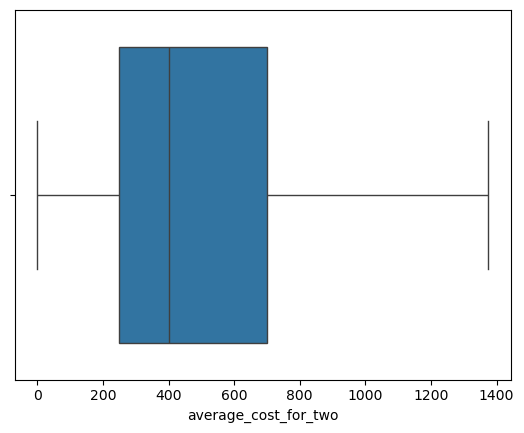

In [44]:
sns.boxplot(data.average_cost_for_two,orient='h')

In [45]:
data.corr(numeric_only=True)

res_id   city_id  latitude  longitude  country_id  \
res_id                1.000000  0.571824  0.019338  -0.041803         NaN   
city_id               0.571824  1.000000  0.031386  -0.038496         NaN   
latitude              0.019338  0.031386  1.000000   0.047101         NaN   
longitude            -0.041803 -0.038496  0.047101   1.000000         NaN   
country_id                 NaN       NaN       NaN        NaN         NaN   
average_cost_for_two -0.213008 -0.329886 -0.012549  -0.004501         NaN   
aggregate_rating     -0.244654 -0.263028 -0.002170   0.069011         NaN   
votes                -0.235851 -0.274275 -0.020726  -0.004032         NaN   
photo_count          -0.106507 -0.236609 -0.013380  -0.021650         NaN   
opentable_support          NaN       NaN       NaN        NaN         NaN   
takeaway                   NaN       NaN       NaN        NaN         NaN   

                      average_cost_for_two  aggregate_rating     votes  \
res_id                           -0.213008         -0.244654 -0.235851   
city_id                          -0.329886         -0.263028 -0.274275   
latitude                         -0.012549         -0.002170 -0.020726   
longitude                        -0.004501          0.069011 -0.004032   
country_id                             NaN               NaN       NaN   
average_cost_for_two              1.000000          0.291608  0.346116   
aggregate_rating                  0.291608          1.000000  0.271953   
votes                             0.346116          0.271953  1.000000   
photo_count                       0.402807          0.218522  0.654966   
opentable_support                      NaN               NaN       NaN   
takeaway                               NaN               NaN       NaN   

                      photo_count  opentable_support  takeaway  
res_id                  -0.106507                NaN       NaN  
city_id                 -0.236609                NaN       NaN  
latitude                -0.013380                NaN       NaN  
longitude               -0.021650                NaN       NaN  
country_id                    NaN                NaN       NaN  
average_cost_for_two     0.402807                NaN       NaN  
aggregate_rating         0.218522                NaN       NaN  
votes                    0.654966                NaN       NaN  
photo_count              1.000000                NaN       NaN  
opentable_support             NaN                NaN       NaN  
takeaway                      NaN                NaN       NaN

<Axes: xlabel='aggregate_rating', ylabel='price_range'>

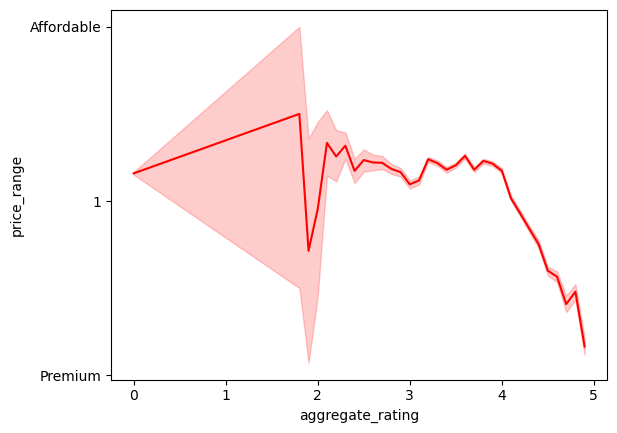

In [46]:
sns.lineplot(x=data.aggregate_rating,y=data.price_range,color='red')

In [47]:
px.bar(x=data.establishment.value_counts().index,y=data.establishment.value_counts(),text=data.establishment.value_counts(),template='plotly_dark')

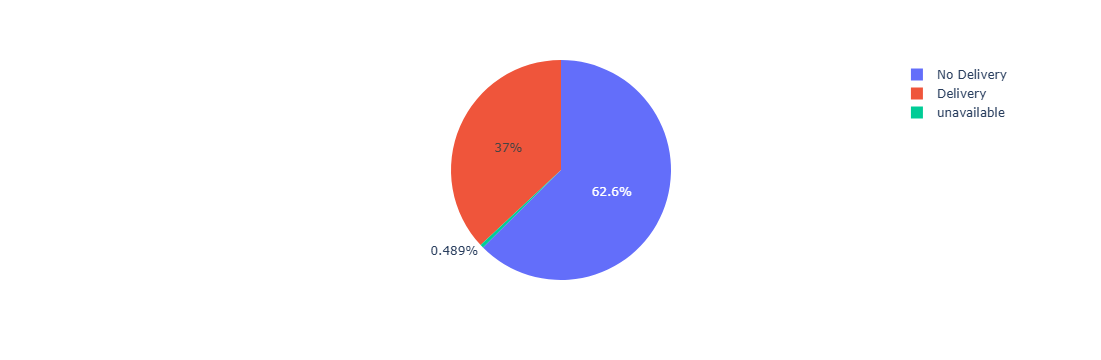

In [145]:
px.pie(values=data.delivery.value_counts(),names=data.delivery.value_counts().index)

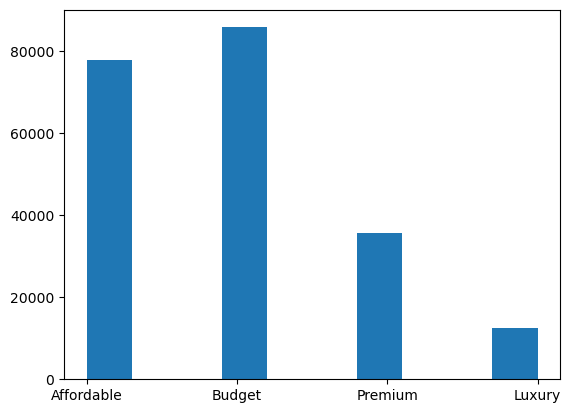

In [147]:
plt.hist(data.price_range)
plt.show()

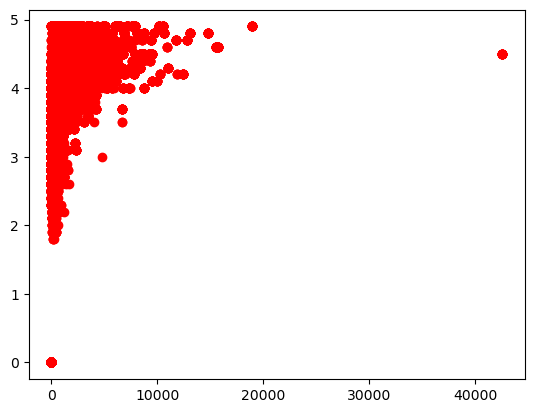

In [50]:
plt.scatter(data.votes,data.aggregate_rating,color='red')

In [51]:
data['cuisines'] = data['cuisines'].str.split(', ')
all_cuisines = pd.Series([cuisine for sublist in data['cuisines'] for cuisine in sublist])


In [52]:
cuisine_counts = all_cuisines.value_counts()
print(cuisine_counts.head(10))

North Indian    86613
Chinese         58416
Fast Food       48886
South Indian    29066
Continental     26266
Beverages       24546
Cafe            23304
Desserts        21485
Italian         20973
Biryani         18327
Name: count, dtype: int64


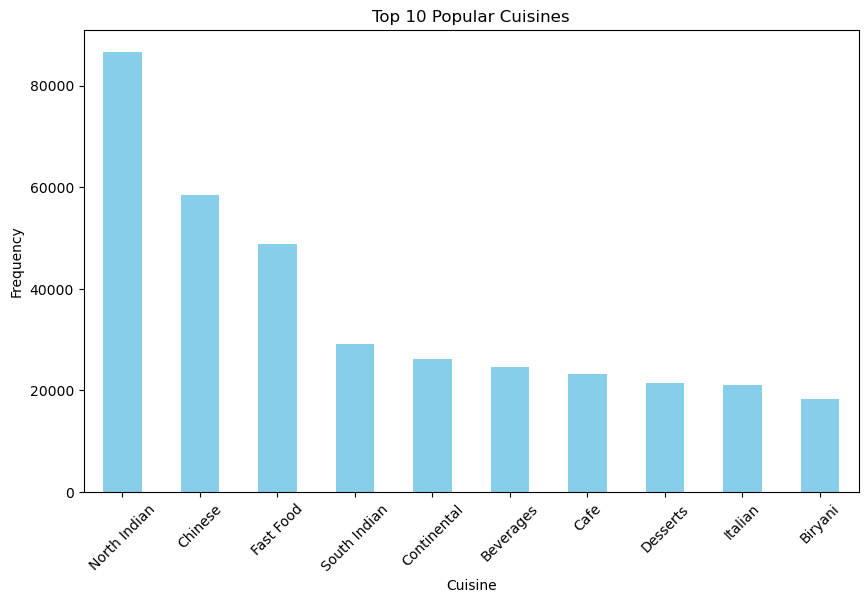

In [53]:
plt.figure(figsize=(10, 6))
cuisine_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [54]:
city_counts = data['city'].value_counts()

In [55]:
city_counts = data['city'].value_counts().head(10)
print("Top 10 cities with the highest number of restaurants:")
print(city_counts)

Top 10 cities with the highest number of restaurants:
city
Chennai      11630
Mumbai        6497
Bangalore     4971
Pune          4217
Lucknow       4121
Jabalpur      3994
New Delhi     3918
Jaipur        3713
Kochi         3370
Ajmer         3277
Name: count, dtype: int64


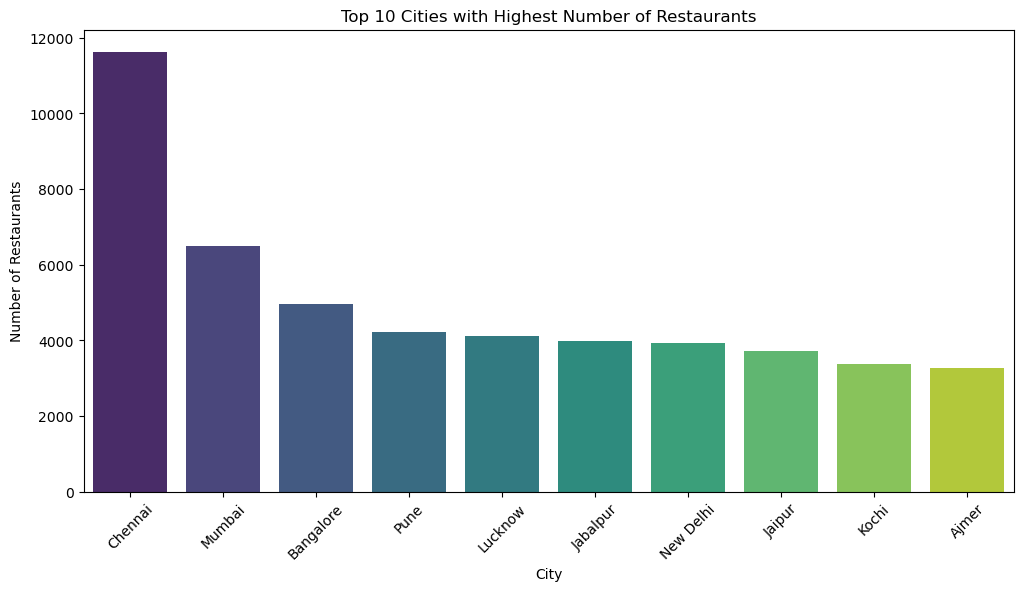

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette='viridis')
plt.title('Top 10 Cities with Highest Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


In [57]:
chain_counts = data['name'].value_counts()

In [58]:
city_counts = data['name'].value_counts().head(10)
print("Top 10 Restaurant Chains by Number of Outlets")
print(city_counts)

Top 10 Restaurant Chains by Number of Outlets
name
Domino's Pizza        3108
KFC                   1343
Cafe Coffee Day       1068
Pizza Hut              936
Subway                 766
Barbeque Nation        725
Burger King            658
McDonald's             578
Keventers              512
The Chocolate Room     461
Name: count, dtype: int64


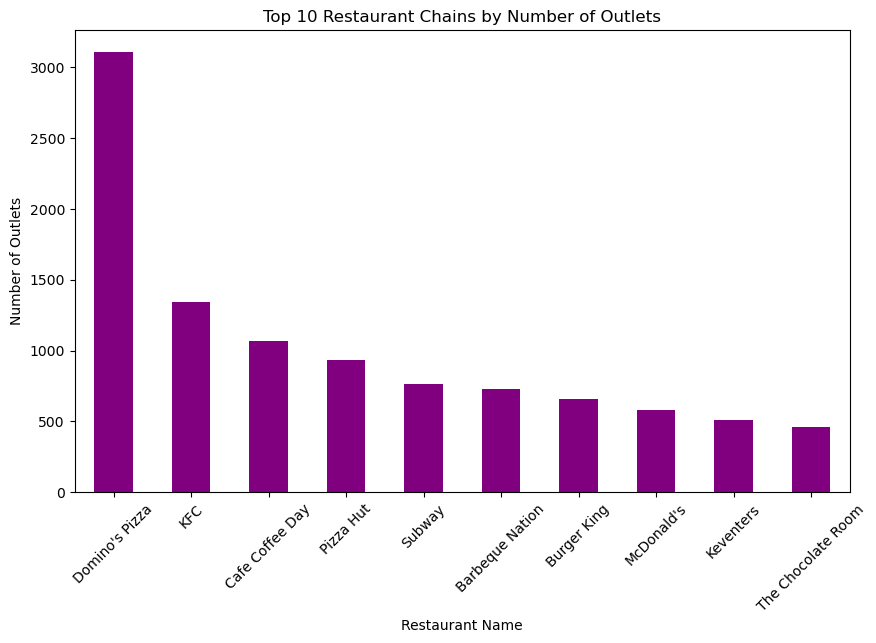

In [59]:
plt.figure(figsize=(10, 6))
chain_counts.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Restaurant Chains by Number of Outlets')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Outlets')
plt.xticks(rotation=45)
plt.show()

In [60]:
data['aggregate_rating'] = pd.to_numeric(data['aggregate_rating'], errors='coerce')
data['average_cost_for_two'] = pd.to_numeric(data['average_cost_for_two'], errors='coerce')


In [61]:
price_rating = data.groupby('price_range')['aggregate_rating'].mean()
price_cost = data.groupby('price_range')['average_cost_for_two'].mean()

Text(0, 0.5, 'Average Rating')

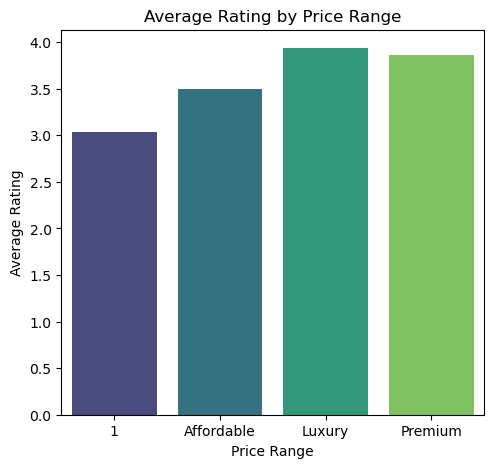

In [62]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=price_rating.index, y=price_rating.values, palette='viridis')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')


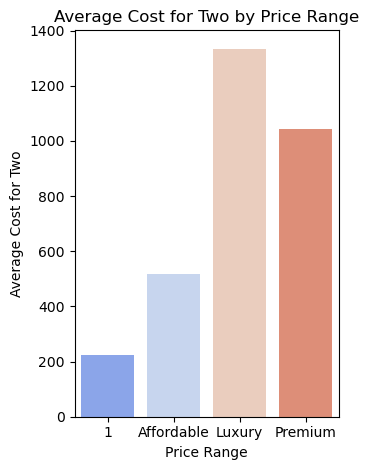

In [63]:
plt.subplot(1, 2, 2)
sns.barplot(x=price_cost.index, y=price_cost.values, palette='coolwarm')
plt.title('Average Cost for Two by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Cost for Two')

plt.tight_layout()
plt.show()

In [64]:
features_list = ['Wi-Fi', 'Serves Alcohol', 'No Alcohol Available', 'Live Music', 'Outdoor Seating']
for feature in features_list:
    data[feature] = data['highlights'].apply(lambda x: 1 if feature in x else 0)

In [65]:
feature_counts = data[features_list].sum().sort_values(ascending=False)

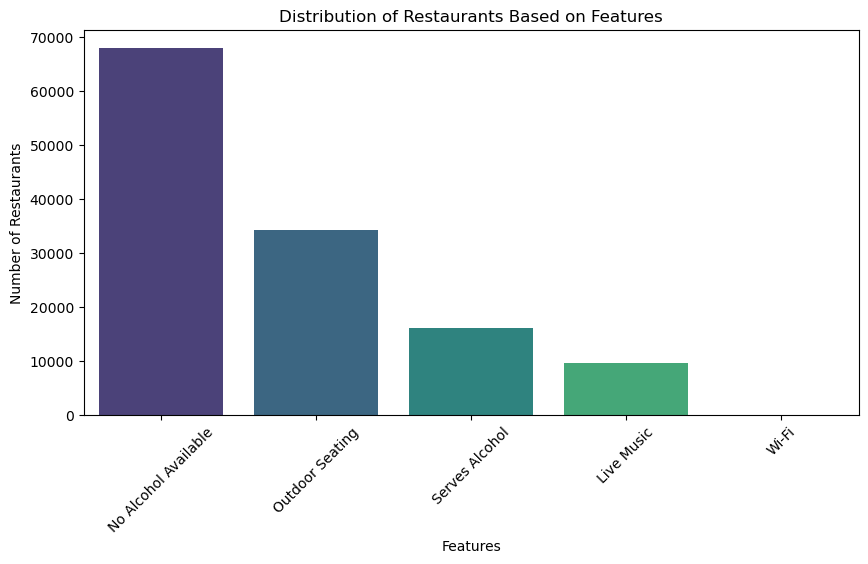

In [66]:
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_counts.index, y=feature_counts.values, palette='viridis')
plt.title('Distribution of Restaurants Based on Features')
plt.xlabel('Features')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

In [67]:
feature_ratings = {}
for feature in features_list:
    with_feature = data[data[feature] == 1]['aggregate_rating'].mean()
    without_feature = data[data[feature] == 0]['aggregate_rating'].mean()
    feature_ratings[feature] = {'With Feature': with_feature, 'Without Feature': without_feature}

In [68]:
feature_ratings_df = pd.DataFrame(feature_ratings).T

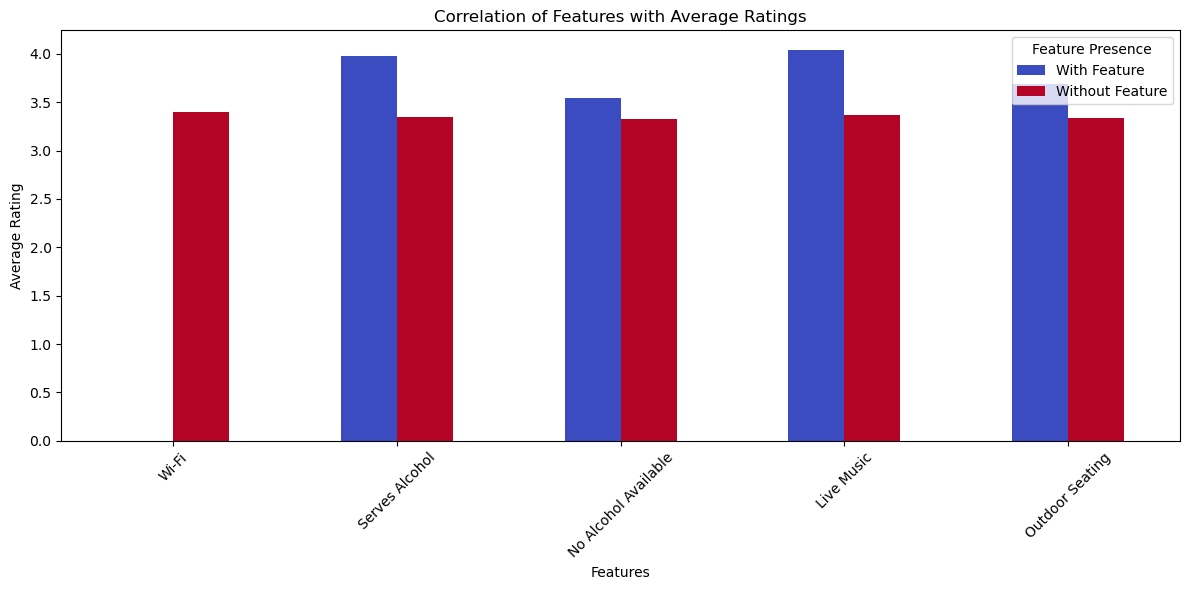

In [69]:
feature_ratings_df.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('Correlation of Features with Average Ratings')
plt.xlabel('Features')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Feature Presence', loc='upper right')
plt.tight_layout()
plt.show()

<Axes: >

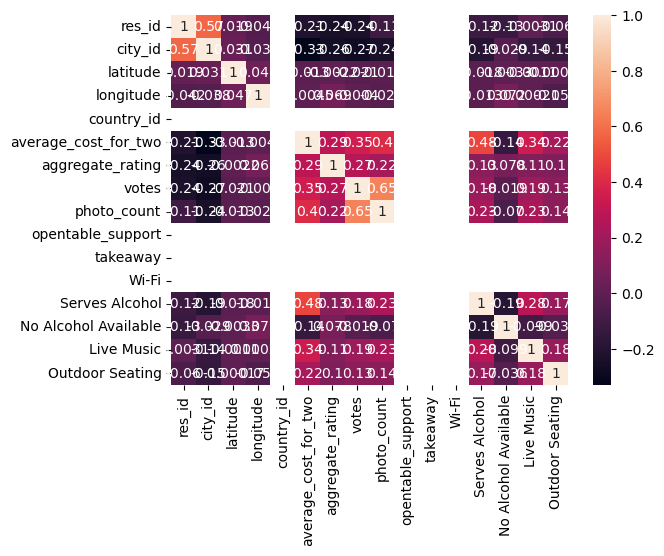

In [70]:
sns.heatmap(data.corr(numeric_only=True),annot=True)